In [2]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
First = pd.read_csv('initialization_1st_results.txt', header = 0)

In [4]:
First.head()

,(+)-Griseofulvin,(S)-(+)-Camptothecin,Chloramphenicol,Metformin,Cell viability
0,1.000,2.0000,0.000,0.5,0.707
1,64.000,2.0000,3.125,128.0,0.636
2,4.000,4.0000,1600.000,4.0,0.726
3,0.500,0.5000,400.000,8.0,0.573
4,0.125,0.0625,100.000,0.0,0.408


In [5]:
First = First.values

In [6]:
Second = pd.read_csv('2nd_final.txt', header = 0)

In [7]:
Second.head()

,(+)-Griseofulvin,(S)-(+)-Camptothecin,Chloramphenicol,Metformin,Cell viability
0,4.00,4.000,1600.00,32,0.974
1,0.25,4.000,6.25,0,0.878
2,2.00,4.000,50.00,0,0.913
3,2.00,16.000,400.00,256,0.936
4,0.00,0.125,200.00,1,0.822


In [8]:
Second = Second.values

In [9]:
test = pd.read_csv('test_1st_results.txt', header = 0)

In [10]:
test.head()

,(+)-Griseofulvin,(S)-(+)-Camptothecin,Chloramphenicol,Metformin,Cell viability
0,16.00,4.0,200.0,256.0,0.640
1,128.00,2.0,800.0,2.0,0.641
2,0.50,0.0,100.0,128.0,0.556
3,1.00,16.0,50.0,0.5,0.708
4,0.25,4.0,12.5,64.0,0.686


In [11]:
test = test.values

In [12]:
regr_1 = RandomForestRegressor()

In [13]:
regr_1.fit(First[:, :-1], First[:, -1])

RandomForestRegressor()

In [14]:
y_1_pred = regr_1.predict(test[:, :-1])

In [15]:
MSE_1 = mean_squared_error(y_1_pred, test[:, -1])

In [16]:
MSE_1

0.02085047182222221

In [17]:
Comb = np.concatenate((First, Second), axis = 0)

In [18]:
regr_2 = RandomForestRegressor()

In [19]:
regr_2.fit(Comb[:, :-1], Comb[:, -1])

RandomForestRegressor()

In [20]:
y_2_pred = regr_2.predict(test[:, :-1])

In [21]:
MSE_2 = mean_squared_error(y_2_pred, test[:, -1])

In [22]:
MSE_by_well_1 = (y_1_pred - test[:, -1])**2

In [23]:
MSE_by_well_2 = (y_2_pred - test[:, -1])**2

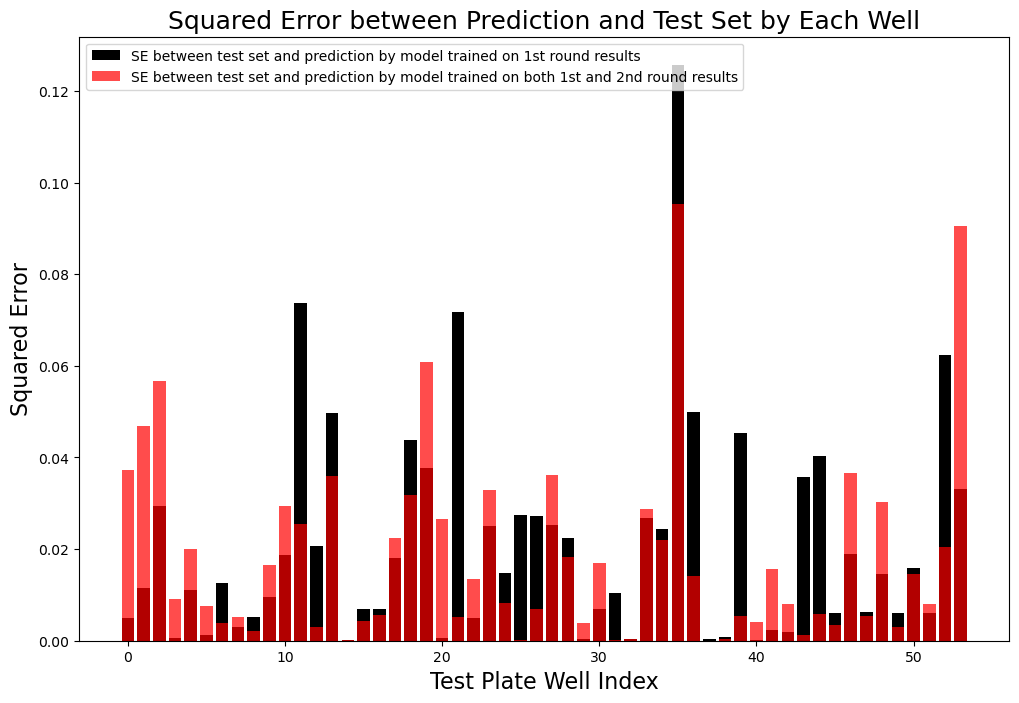

In [26]:
plt.figure(figsize=(12, 8), dpi=100)
idx = [i for i in range(54)]
plt.bar(idx, MSE_by_well_1, label = "SE between test set and prediction by model trained on 1st round results", linestyle = "--", color = "black")
plt.bar(idx, MSE_by_well_2, label = "SE between test set and prediction by model trained on both 1st and 2nd round results", linestyle = "--", color = 'red', alpha = 0.7)
plt.title("Squared Error between Prediction and Test Set by Each Well", fontsize = 18)
plt.xlabel("Test Plate Well Index", fontsize = 16)
plt.ylabel("Squared Error", fontsize = 16)
plt.legend(loc = "upper left")
plt.show()

In [25]:
X_label = ['Experiment Round 1', 'Experiment Round 2']
Acc = [MSE_1, MSE_2]

In [25]:
Acc

[0.020428789385185168, 0.01951330035370371]

In [26]:
impro_percentage = (MSE_1 - MSE_2)/ MSE_1
impro_percentage

0.044813670267968266

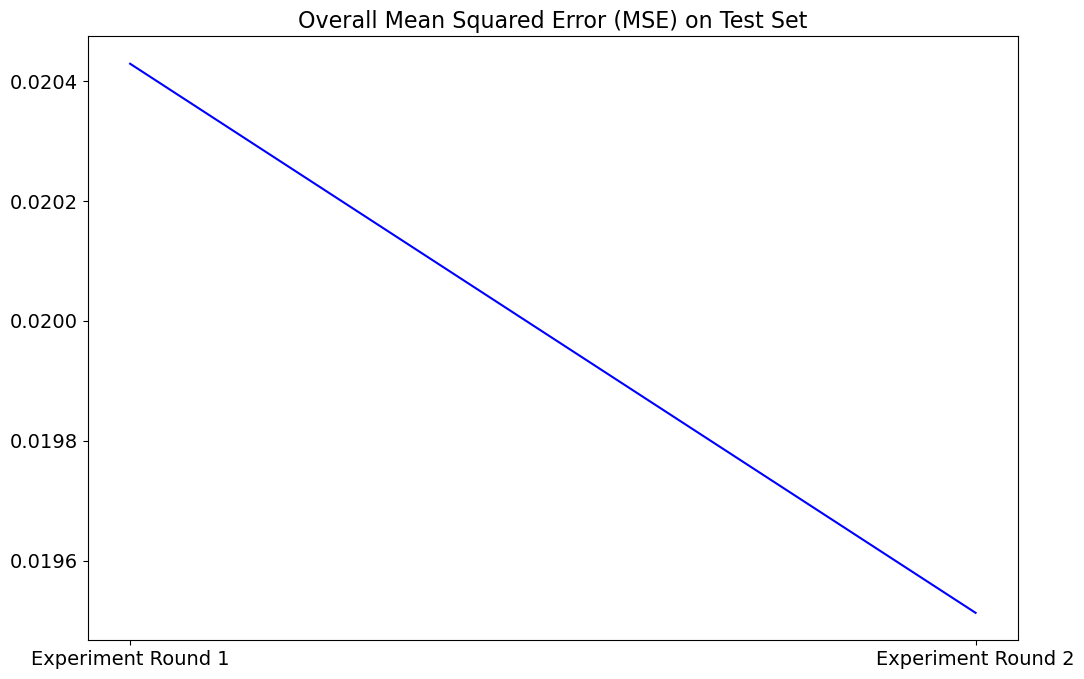

In [27]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(X_label, Acc, color = 'blue')
plt.title('Overall Mean Squared Error (MSE) on Test Set', fontsize = 16)
plt.xticks(X_label, fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()